# KNeighborsRegressor

Existe una version para regresion del KNN, en lugar de contar la cantidad de vecinos y establecer una propensión, establece un interpolación entre vecinos para hacer la predicción

El siguiente es un fenomeno artificialmente generado. Veamos que puede hacer KNN para predecir y a partir de x

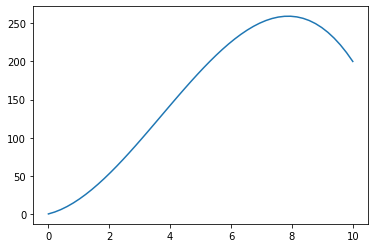

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

coefs = [0, -0.9, 10, 10]
x = np.linspace(0, 10, 50)
#x += np.random.normal(0, 0.1, size=len(x))
y = 0
for i in range(len(coefs)):
    y += coefs[i] * x**(len(coefs)-i)


# Agregar ruido aleatorio opcionalmente
#y += np.random.normal(0, 20, size=len(x))
plt.plot(x, y)
plt.show()

Agregamos ruido normalmente distribuido. No hay autocorrelación, o un "moving average". Dicho coloquialmente, el fenomeno es el mismo, cada valor de y depende de x + un error propio, errores previos o valores previos no lo afectan. Tambien los transformo en dataframe y serie (No es necesario pero para normalizar el trabajo en todos los notebooks)  

In [81]:
x += np.random.normal(0, 0.1, size=len(x))
y += np.random.normal(0, 30, size=len(x))
X = pd.DataFrame(x, columns=['x'])
y = pd.Series(y, name='y')


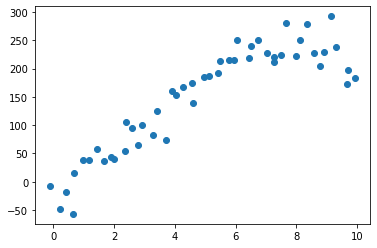

In [82]:
plt.scatter(X, y)
plt.show()

Grupo de reserva

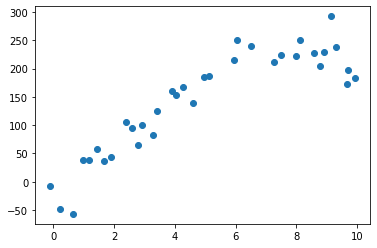

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)
plt.scatter(X_train, y_train)
plt.show()


Una regresión lineal rápida

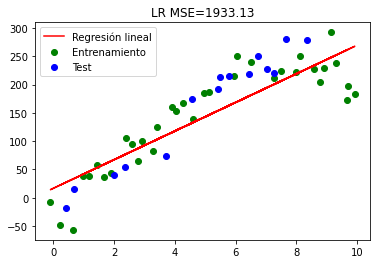

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
plt.plot(X_train['x'], model.coef_*X_train['x'] + model.intercept_, color='red', label='Regresión lineal')
plt.scatter(X_train['x'], y_train, color='green', label='Entrenamiento')
plt.scatter(X_test['x'], y_test, color='blue', label='Test')
plt.legend()
plt.title('LR MSE={:.2f}'.format(mean_squared_error(y_test, model.predict(X_test))))
plt.show()


Un KNN claramente sobreajustado

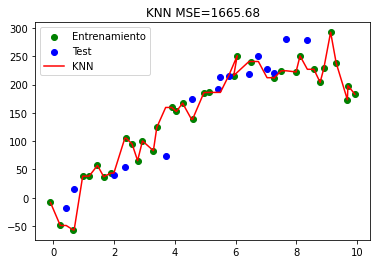

In [89]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)
y_predict = model.predict(X)
plt.scatter(X_train['x'], y_train, color='green', label='Entrenamiento')
plt.scatter(X_test['x'], y_test, color='blue', label='Test')
plt.plot(X, model.predict(X) , color='red', label='KNN')
plt.title('KNN MSE={:.2f}'.format(mean_squared_error(y_test, model.predict(X_test))))
plt.legend()
plt.show()

Buscamos un mejor ajuste

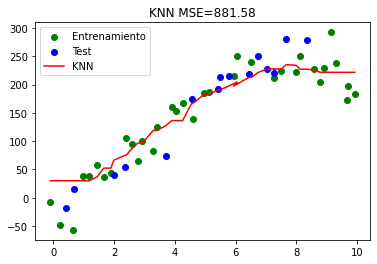

In [90]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_predict = model.predict(X)
plt.scatter(X_train['x'], y_train, color='green', label='Entrenamiento')
plt.scatter(X_test['x'], y_test, color='blue', label='Test')
plt.plot(X, model.predict(X) , color='red', label='KNN')
plt.title('KNN MSE={:.2f}'.format(mean_squared_error(y_test, model.predict(X_test))))
plt.legend()
plt.show()